# data loading

In [123]:
#data collected from Road traffic statistics: https://roadtraffic.dft.gov.uk/downloads
#file contains data for number of vehicles that travel past the count point (in both directions) on an average day of the year.
import pandas as pd
import numpy as np

df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()





,Count_point_id,Year,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,6750,2014,6,London,E12000007,96,Islington,E09000019,A201,PA,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,E12000007,104,Lewisham,E09000023,A2,PA,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,E12000007,178,Kingston upon Thames,E09000021,A240,PA,...,175,1589,251,35,13,2,4,19,325,12951
3,16544,2014,5,North West,E12000002,85,Manchester,E08000003,A57,PA,...,911,1931,239,53,105,25,107,47,576,16107
4,27765,2014,6,London,E12000007,57,Barnet,E09000003,A5109,PA,...,302,1651,246,12,12,0,1,1,273,19276


# EDA-analysis

In [3]:
# looking at the columns we will work with
df.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [4]:
#checking data quality in regards to null values
df.isnull().sum()

Count_point_id                       0
Year                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        121975
End_junction_road_name          121964
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  121499
Link_length_miles               121499
Estimation_method                    0
Estimation_method_detailed           0
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches                    0
LGVs                     

Text(0.5, 1.0, 'UK daily traffic average (mileage)')

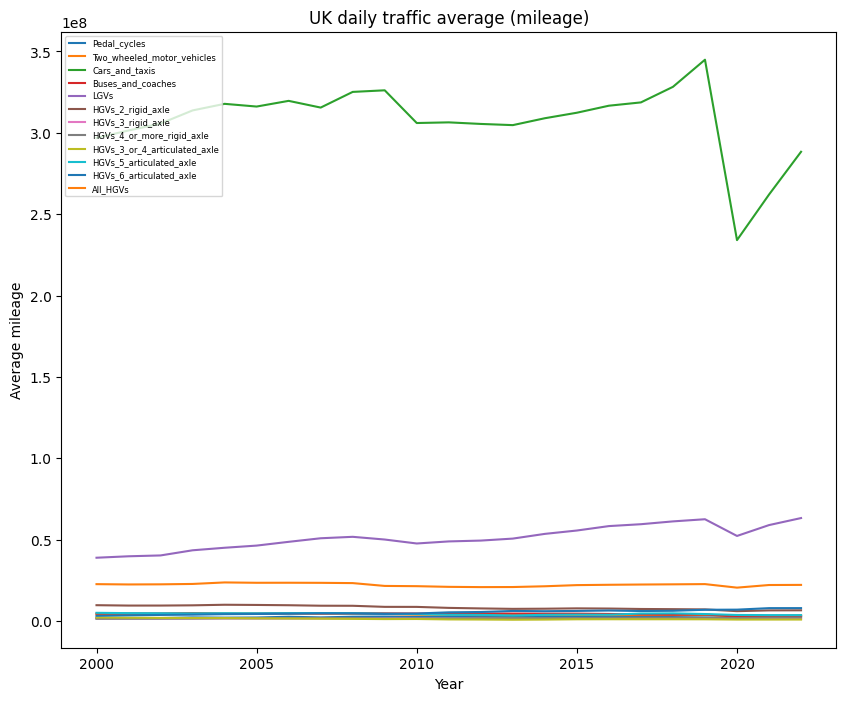

In [5]:
#list of vehicle types in the data

veh_lst = ['Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs']
#look at the average mileage of a road junction in the view of different type of vehicles
import matplotlib.pyplot as plt
veh_df = df.groupby('Year')[veh_lst].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(veh_df, label = veh_lst)
ax.legend(loc = 'upper left', prop={'size': 6})
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('UK daily traffic average (mileage)')



In [6]:
df_region

NameError: name 'df_region' is not defined

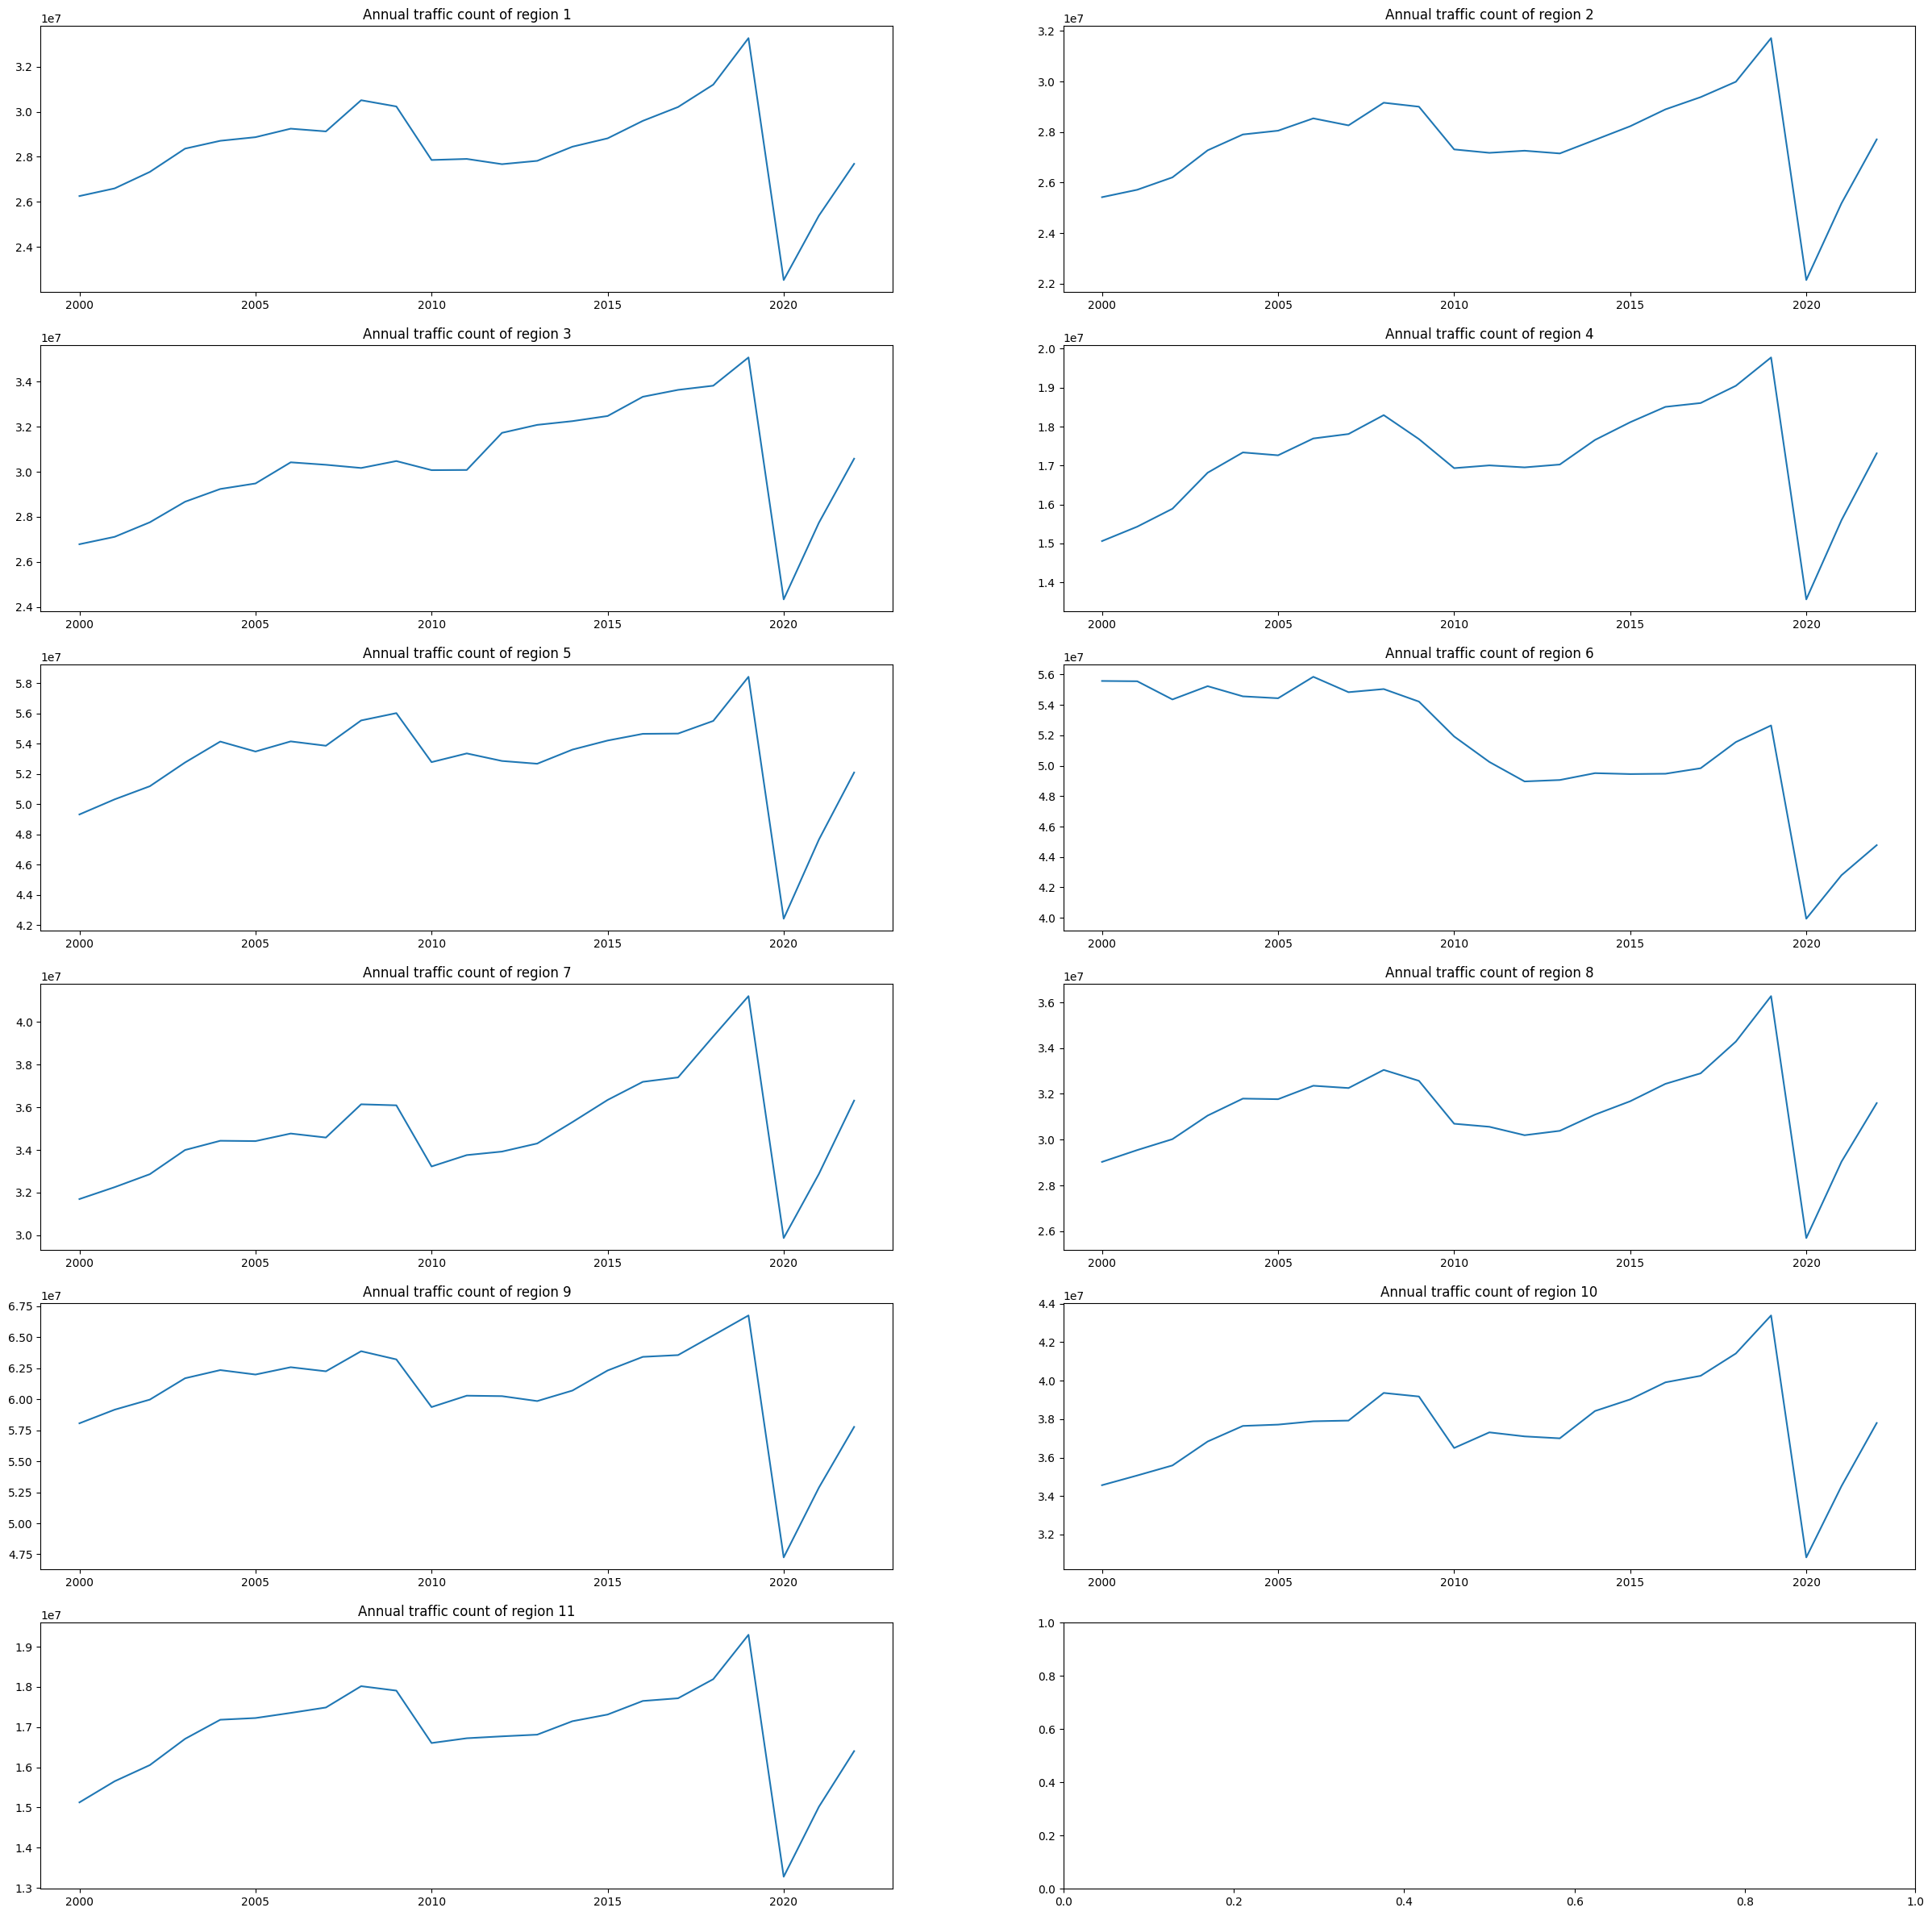

In [7]:
# a view of traffic count in each region
df_region = df.groupby(['Region_id', 'Year'])['All_motor_vehicles'].sum().reset_index()
df_region.set_index('Year', inplace=True)
fig, axes = plt.subplots(nrows=round(len(df.Region_id.unique())/2), ncols=2, figsize=(30,30))

axes = axes.flatten()
for i in range(0, len(df.Region_id.unique())):
    axes[i].plot(df_region[df_region['Region_id'] == i + 1]['All_motor_vehicles'])
    axes[i].set_title(f'Annual traffic count of region {i + 1}')
        

<Axes: title={'center': 'All motor vehicles average daily traffic (mileage)'}, xlabel='Year'>

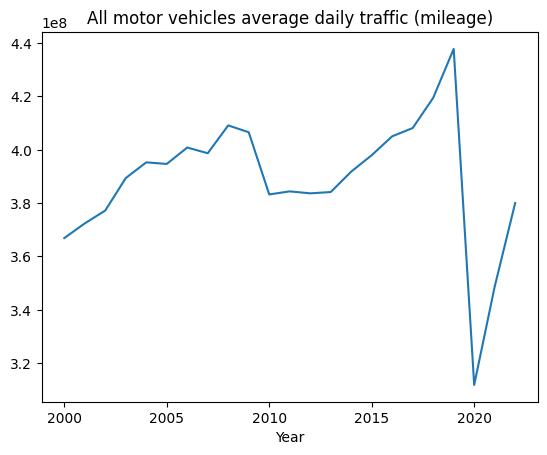

In [8]:
# a view of all motor vehicle average mileage in the past years
df_all = df.groupby('Year')['All_motor_vehicles'].sum()
df_all.plot(title='All motor vehicles average daily traffic (mileage)')

In [9]:
# Now we want to look at spacial distribution by local authority code of the UK traffic in the past year
count = df.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
count_2022 = count[count['Year'] == 2022]
count_2022.sort_values(by='All_motor_vehicles', ascending=False)

,Year,Local_authority_code,All_motor_vehicles
4654,2022,E10000016,11013152
4652,2022,E10000014,9520552
4665,2022,E10000030,9083107
4653,2022,E10000015,8950306
4650,2022,E10000012,7956841
...,...,...,...
4669,2022,S12000005,162143
4683,2022,S12000027,112349
4681,2022,S12000023,74064
4674,2022,S12000013,54441


In [10]:
#importing wards data to geopandas for plotting
#importing postcode data to map wards to postcodes
#& (map['LONG'] > -3.4) & (map['LONG'] < 1.7)
import geopandas as gpd
map = gpd.read_file('Wards_December_2023_Boundaries_UK_BFC_9190024445622031540/WD_DEC_2023_UK_BFC.shp')
# showing the spatial view not including scotland
map = map[(map['LAT'] < 55.8)]
LAD = pd.read_csv("Middle_Layer_Super_Output_Area_(2021)_to_Ward_to_LAD_(May_2023)_Lookup_in_England_and_Wales.csv")

# Map the wards with the local authority code
merge = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
merge.drop_duplicates(subset='WD23CD', keep='first', inplace=True)

# now we can merge the traffic count to the wards on the lac
merge_2 = pd.merge(merge, count_2022[['Local_authority_code', 'All_motor_vehicles']], how='left', left_on='LAD23CD',right_on='Local_authority_code')
merge_2.drop_duplicates(subset='WD23CD', keep='first', inplace=True)
merge_2['All_motor_vehicles'] = merge_2['All_motor_vehicles'].fillna(0)

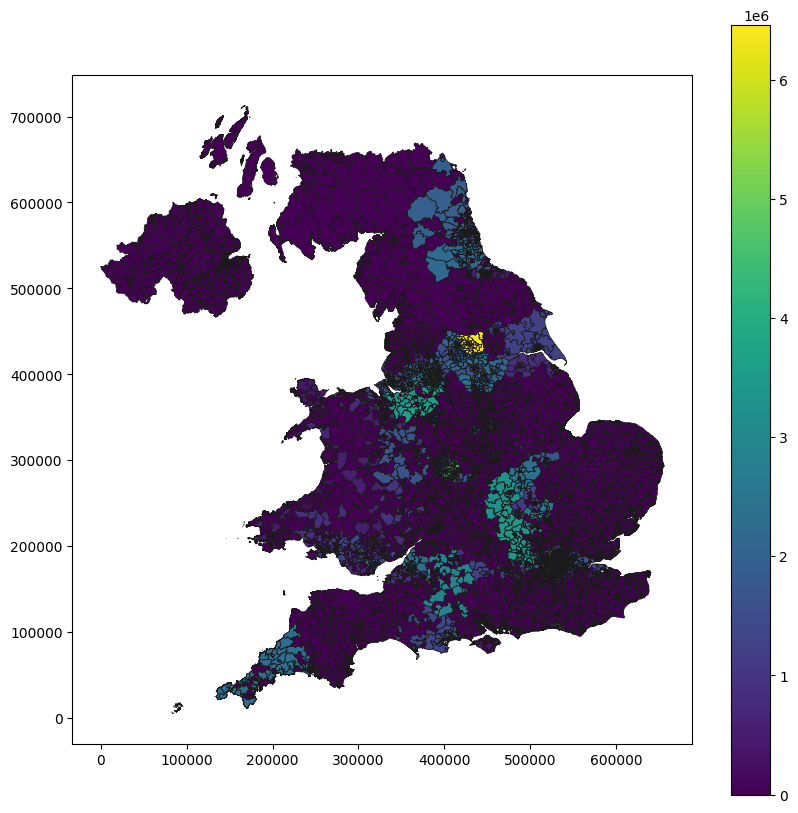

In [11]:
# Create a spacial view
fig, ax = plt.subplots(figsize=(10, 10))
merge_2.plot(ax=ax, column='All_motor_vehicles', cmap='viridis', linewidth=0.5, edgecolor='0.1', legend=True)

# Show the plot

plt.show()

# Prophet forecasting

In [12]:
# Suppose we would like to predict the future traffic for each region in the next 10 years.
# In here we will use the facebook prophet model as the modelling approach, as in the above eda process we can see the impact of covid-19 has caused a unpresendented impact to the trend.
# On this note, Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects, which make it a good candidate to deal with seasonal data
# and also its ability to handles outliers well.

In [98]:
import pandas as pd
def data_read(path: str) -> pd.DataFrame:

    df = pd.read_csv(path)

    return df


def add_future_frame(model, period: int) -> pd.DataFrame:

    df = model.make_future_dataframe(periods=period)

    return df


def get_upper(df: pd.DataFrame) -> pd.DataFrame:
        
    df = df.copy(deep=True)
    for t_col in ['ds', 'upper']:
        df[t_col] = pd.to_datetime(df[t_col])
    df['upper_window'] = (df['upper'] - df['ds']).dt.days
    df.drop(columns='upper', inplace=True)

    return df

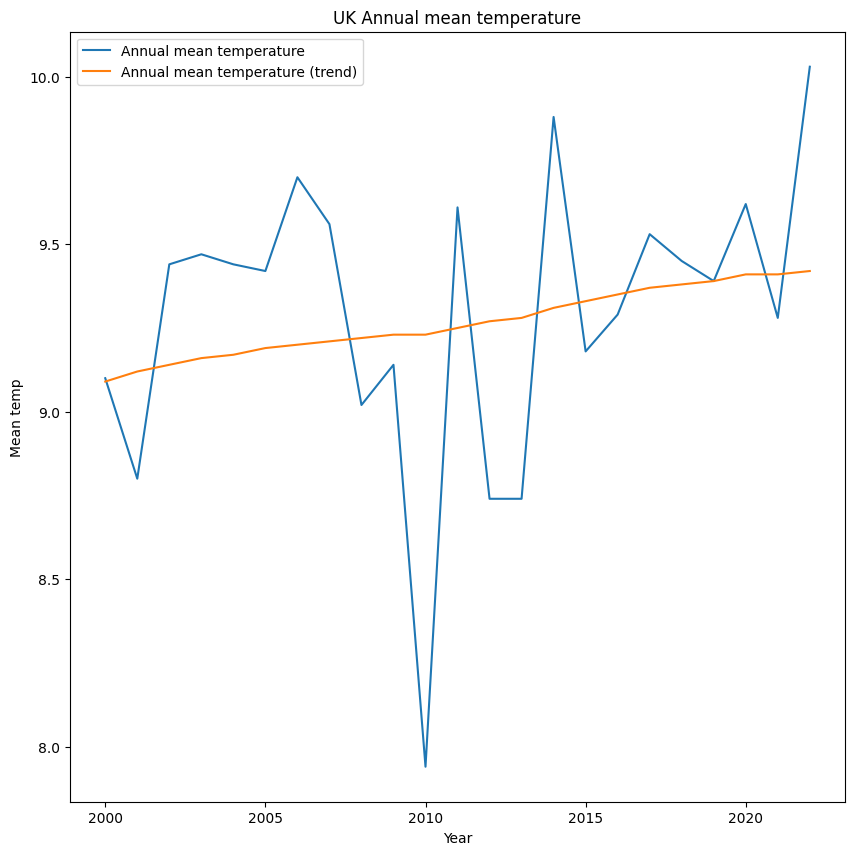

In [97]:
import matplotlib.pyplot as plt
# importing historic data; change column to ds and y
df_traffic = data_read('dft_traffic_counts_aadf.csv')
df_traffic = df_traffic[['Year', 'Region_id', 'All_motor_vehicles']].rename(columns={'Year' : 'ds', 'All_motor_vehicles': 'y'})
df_traffic = df_traffic.groupby(['ds', 'Region_id'])['y'].sum()
df_traffic = df_traffic.reset_index()
# we can add regressor to the linear part of the prophet model, which aims to improve the forecasting accuracy.
# to do that we need the weather data of UK since 2000
df_weather = data_read('chart-data.csv')
df_weather.set_index('date', inplace=True)
# lets visualize the mean tempearture change over the years and its trend since 2000
# df_weather.index = pd.to_datetime(df_weather.index, format='%Y%m%d').year
fig, ax = plt.subplots(figsize=(10,10)) 

ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature'], label='Annual mean temperature')
ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature (trend)'], label='Annual mean temperature (trend)')
plt.ylabel('Mean temp')
plt.xlabel('Year')
plt.title('UK Annual mean temperature')
plt.legend()
plt.show()

In [99]:
import itertools
# To include covid-19 as a holiday regressor to include in the model.
lockdowns = pd.DataFrame({
  'holiday': 'lockdown',
    # dates of national lockdown UK
  'ds': ['2020-03-26', '2020-11-05', '2021-01-06'],
  'lower_window': 0,
  'upper': ['2020-07-04', '2020-12-02', '2021-03-08']
})

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    # 'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    # 'seasonality_mode': ['additive', 'multiplicative'],
    # Add other parameters here
}

# Create all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [100]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics


groupby_col = ['Region_id']

# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
# using dictionary to store the model for each region
model_dict = {}
# adding weather regressor to the traffic data
df_traffic_merge = pd.merge(df_traffic, df_weather[['Annual mean temperature']], left_on='ds', right_on= df_weather.index, how='left')
# first, look at the traffic forecast for all regions
df_traffic_merge_all = df_traffic_merge.groupby('ds').agg({'y': 'sum', 'Annual mean temperature': 'mean'}).reset_index()
df_traffic_merge_all['ds'] = pd.to_datetime(df_traffic_merge_all['ds'].astype(str) + '-01-01')

In [115]:
# Define the initial training period, period, and horizon (in years)
initial = f'{10*365} days'  
period = f'{3*365} days'   
horizon = f'{2*365} days' 

In [126]:
lockdowns_ = get_upper(lockdowns)
mape_mean = []
#using cross validation to agg the mape from different folds
for params in all_params:
    m = Prophet(**params, holidays=lockdowns_)
    m.add_regressor('Annual mean temperature')
    m.fit(df_traffic_merge_all)
    df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)
    df_p = performance_metrics(df_cv)
    mape_mean.append(df_p.mape.mean())

22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/4 [00:00<?, ?it/s]22:29:46 - cmdstanpy - INFO - Chain [1] start processing
22:29:46 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:00,  3.10it/s]22:29:46 - cmdstanpy - INFO - Chain [1] start processing
22:29:46 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  3.04it/s]22:29:46 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:01<00:00,  2.80it/s]22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/4 [00:00<?, ?it/s]22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:48 -

In [133]:
#getting the best params from above hpt
#fitting the model with best params
best_params = all_params[np.argmin(mape_mean)]
best_model = Prophet(**best_params, holidays=lockdowns_)
best_model.add_regressor('Annual mean temperature')
best_model.fit(df_traffic_merge_all)

22:47:30 - cmdstanpy - INFO - Chain [1] start processing
22:47:30 - cmdstanpy - INFO - Chain [1] done processing
